<a href="https://colab.research.google.com/github/AsmaAgrebi/PFE/blob/main/Code_PFE_Asma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/My Drive/pfe asma'

/content/gdrive/My Drive/pfe asma


In [ ]:
!pip install anvil-uplink
import anvil.server
anvil.server.connect("QQ7S7CLLL5CMQJK4IOCPPOZW-DVL34TJBISJHFW5S") #copie

In [ ]:
!pip install pyproj
!pip install easyocr

     |████████████████████████████████| 6.6MB 8.4MB/s 
     |████████████████████████████████| 63.2MB 49kB/s 


In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import easyocr
import os
from numpy import ones,vstack
from numpy.linalg import lstsq
import math
from sympy import *
from PIL import Image, ImageDraw
import shutil
from osgeo import gdal, osr
import pyproj
import shutil
from osgeo import gdal, osr
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image, ImageDraw
import re
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import itertools
from PIL import *
from PIL import Image, ImageDraw, ImageFilter



In [ ]:

@anvil.server.callable
#dpoint=pd.DataFrame()
def colors(image):
  hsv_frame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  low_red = np.array([161, 155, 84])
  high_red = np.array([179, 255, 255])
  red_mask = cv2.inRange(hsv_frame, low_red, high_red)
  red = cv2.bitwise_and(image, image, mask=red_mask)
  cv2.imwrite('rouge.jpg',red)
  low_blue = np.array([94, 80, 2])
  high_blue = np.array([126, 255, 255])
  blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
  blue = cv2.bitwise_and(image, image, mask=blue_mask)
  cv2.imwrite('bleu.jpg',blue)
  low_green = np.array([25, 52, 72])
  high_green = np.array([102, 255, 255])
  green_mask = cv2.inRange(hsv_frame, low_green, high_green)
  green = cv2.bitwise_and(image, image, mask=green_mask)
  cv2.imwrite('vert.jpg',green)
  low = np.array([0, 42, 0])
  high = np.array([179, 255, 255])
  mask = cv2.inRange(hsv_frame, low, high)
  result = cv2.bitwise_and(image, image, mask=mask)
  cv2.imwrite('all colors.jpg',result)
  im_rgbr = Image.open("rouge.jpg")
  im_rgbar = im_rgbr.copy()
  im_rgbar.putalpha(128)
  im_rgbar.save('rouge.png')
  im_rgbb = Image.open("bleu.jpg")
  im_rgbab = im_rgbb.copy()
  im_rgbab.putalpha(128)
  im_rgbab.save('bleu.png')
  im_rgbv = Image.open("vert.jpg")
  im_rgbav = im_rgbv.copy()
  im_rgbav.putalpha(128)
  im_rgbav.save('vert.png')

def triangles(image):
  #fig, axs = plt.subplots(2,3, figsize=(15, 16)) #, facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)
  #axs = axs.ravel()
  #fig2, axs2 = plt.subplots(2,3, figsize=(15, 16)) #, facecolor='w', edgecolor='k')
  #axs2 = axs2.ravel()
  #fig3, axs3 = plt.subplots(2,3, figsize=(15, 16)) #, facecolor='w', edgecolor='k')
  #axs3= axs3.ravel()
 # fig = plt.figure()
  points=[]
  #global dpoint
  dpoint=pd.DataFrame()
  dpoint2=pd.DataFrame()
  img_rgb=image
  img_rgb2=image
  img_rgb3=image
  #img_rgb2 = cv2.cvtColor(img_rgb2, cv2.COLOR_BGR2GRAY)
  #img_gray2 = cv2.cvtColor(img_rgb2, cv2.COLOR_GBR2GRAY)
  img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
  img_gray2 = cv2.cvtColor(img_rgb2, cv2.COLOR_BGR2GRAY)
  template = cv2.imread('template.jpg',0)
  template2 = cv2.imread('template2.jpg',0)
  template3 = cv2.imread('template3.jpg',0)
  template4 = cv2.imread('template4.jpg',0)
  template5 = cv2.imread('template5.jpg',0)
  template6 = cv2.imread('template6.jpg',0)
  template7 = cv2.imread('template77.jpg',0)
  template8 = cv2.imread('template88.jpg',0)
  template9 = cv2.imread('template99.jpg',0)

  template10= cv2.imread('template1010.jpg',0)

  templates=(template,template2,template3, template4, template5, template6,template7, template8,template9,template10)
  #print(templates)
  w, h = template.shape[::-1]
  l=[]
  for temp in templates:
    res = cv2.matchTemplate(img_gray,temp,cv2.TM_CCOEFF_NORMED)
    l.append(res)

  threshold = 0.8
  loc=[]
  for i in l:
    loc.append(np.where( i >= threshold))
  print(loc)
  pixels_triangles=[]
  #for ax in axs:
    #ax = fig.add_subplot(3, 3, i+1)
  for t in loc:

    print("******",loc)
    for pt in zip(*t[::-1]):
      a=pt
      pixels_triangles.append(a)
      print(pixels_triangles)
      for a, b in itertools.combinations(pixels_triangles, 2):
        #if len(pixels_triangles)>2:
        if (a[0] - b[0]) in range(-10,10):  #
          pixels_triangles.remove(a)
      #print(pixels_triangles)
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h-7), (0,0,255), 2)

  cv2.imwrite("triangles detectes.jpg", img_rgb)



  for index1,item1 in enumerate(pixels_triangles):
    ind=str(index1)
    zone_triangle = img_rgb[item1[1]-75:item1[1]+75 , item1[0]-55:item1[0]+55]
    zone_triangleth = img_gray[item1[1]-30:item1[1]+65 , item1[0]-35:item1[0]+55]
    zone_triangle2 = img_gray[item1[1]:item1[1]+10 , item1[0]:item1[0]+10]
    zone_triangle22 = image[item1[1]:item1[1]+10 , item1[0]:item1[0]+10]
    ret,th=cv2.threshold(zone_triangle2,150,255,cv2.THRESH_BINARY)
    ret,th22=cv2.threshold(zone_triangleth,120,255,cv2.THRESH_BINARY)
    ret,th2=cv2.threshold(th22,120,100,cv2.THRESH_BINARY)
    im1=Image.fromarray(th)
      #im=ImageOps.grayscale(im1)
    im=im1.convert('RGB')
    im2=im
    for x in range(im.size[0]):
      for y in range(im.size[1]):
        r, g, b = im.getpixel((x, y))
        if r==g==b==0:
          pc=[x+item1[0]+1  ,y +item1[1]+2]
          dpoint = dpoint.append(pd.Series([pc[0], pc[1],index1 ], index=['X triangle(en Pixel)','Y triangle(en Pixel)',"indice"]), ignore_index=True)

  dpoint=dpoint.groupby("indice", as_index=False).mean()
  dpoint.to_csv("triangles_geodesiques.csv", sep='\t',index=False)
  #cv2.imwrite("trrrrr.jpg", image)

  return dpoint



  #-------------------------------------------------merci --------------------------------

#def line(x1,y1, x2,y2):

  #points = [(x1,y1),(x2,y2)]
  #x_coords, y_coords = zip(*points)
  #A = vstack([x_coords,ones(len(x_coords))]).T
 # A=A.astype(float)

 # m, c = lstsq(A, y_coords )[0]
  #m, c = lstsq(A, y_coords )
 # return m,c

from decimal import Decimal


def line(x1,y1,x2,y2):
    """Line encoded as l=(x,y)."""
    m = Decimal((y2 - y1)) / Decimal(x2 - x1)
    c = (y2 - (float(m) * x2))
    return float(m), float(c)


def utm(x1,y1,x2,y2, x):
  m,c= line(x1,y1,x2,y2)
  return x*m+c


#--------------------------------------------------------------------------------------der1-------------------



def infos(image):
#ROI
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  zone_titre = image[:500,2000:4000]
  cv2.imwrite("titre.jpg", zone_titre)
  msg=[]
  #OCR
  #reader = easyocr.Reader(['ch_sim','en']) # need to run only once to load model into memory
  reader = easyocr.Reader(['en'], recog_network = 'latin_g1')
  result_titre= reader.readtext(zone_titre,detail=0)
  print(result_titre)
  zone_echelle = image[3500:, 3000:4000]
  cv2.imwrite("echelle.jpg", zone_echelle)
  zone_echelle2= image[-3500:,3000:]
  ech = reader.readtext(zone_echelle,detail=0)
  print("ech",ech)
  ech2 = reader.readtext(zone_echelle2,detail=0)
  #titre=[]
  echelle=[]
  ti=[]
  indice=0
  s = []
  for index,item in enumerate(result_titre):
    ''' -----------------------this is a test----------------------------- '''
    print(str(item) +'    '+ str(item.isdigit()))
    if item.isdigit() == True:

      s=result_titre[:index]
      print(s)
      break

  s=[x for x in s if not any(c.isdigit() for c in x)]
  print(s)
  type(s)
  titre = ' '.join(s)

  '''------------------------------------------------------------------'''


  ech_pattern =  re.compile(".*:.* .*")
  for output in ech:
    if re.match(ech_pattern, output[-2]):
      print(output)
      echelle = output[-2]
      echelle=echelle[-8:]
  if echelle ==[]:
    for i in range ( len( ech)):
      if ech[i].upper().startswith("ECHELLE"):
        echelle=ech[i][-8:]
  echelle=echelle.replace('o', '0')
  echelle=echelle.replace('O', '0')

  #echelle=str(echelle).replace('o', '0')
  print(echelle)
  #titre=titre.replace('O', '0')
  msg="Titre:    " + titre + "    Echelle:  "+ echelle
  return msg
def georef(image):
  def shi_tomashi(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, 4, 0.01, 100)
    corners = np.int0(corners)
    corners = sorted(np.concatenate(corners).tolist())
    #print('\nThe corner points are...\n')

    im = image.copy()
    for index, c in enumerate(corners):
        x, y = c
        cv2.circle(im, (x, y), 3, 255, -1)
        character = chr(65 + index)
       # print(character, ':', c)
        cv2.putText(im, character, tuple(c), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)

    return corners

  def get_destination_points(corners):

    w1 = np.sqrt((corners[0][0] - corners[1][0]) ** 2 + (corners[0][1] - corners[1][1]) ** 2)
    w2 = np.sqrt((corners[2][0] - corners[3][0]) ** 2 + (corners[2][1] - corners[3][1]) ** 2)
    w = max(int(w1), int(w2))

    h1 = np.sqrt((corners[0][0] - corners[2][0]) ** 2 + (corners[0][1] - corners[2][1]) ** 2)
    h2 = np.sqrt((corners[1][0] - corners[3][0]) ** 2 + (corners[1][1] - corners[3][1]) ** 2)
    h = max(int(h1), int(h2))

    destination_corners = np.float32([(0, 0), (w - 1, 0), (0, h - 1), (w - 1, h - 1)])

    #print('\nThe destination points are: \n')
    for index, c in enumerate(destination_corners):
        character = chr(65 + index) + "'"
      #  print(character, ':', c)

  #  print('\nThe approximated height and width of the original image is: \n', (h, w))
    return destination_corners, h, w


  def unwarp(img, src, dst):
    """
    Args:
        img: np.array
        src: list
        dst: list
    Returns:
        un_warped: np.array
    """
    h, w = img.shape[:2]
    H, _ = cv2.findHomography(src, dst, method=cv2.RANSAC, ransacReprojThreshold=3.0)
  #  print('\nThe homography matrix is: \n', H)
    un_warped = cv2.warpPerspective(img, H, (w, h), flags=cv2.INTER_LINEAR)

    # plot

   # f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
    # f.subplots_adjust(hspace=.2, wspace=.05)
    #ax1.imshow(img)
    #ax1.set_title('Original Image')
    x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
    y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]

    #ax2.imshow(img)
   # ax2.plot(x, y, color='yellow', linewidth=3)
   # ax2.set_ylim([h, 0])
  #  ax2.set_xlim([0, w])
  #  ax2.set_title('Target Area')

    #plt.show()
    return un_warped

  #name=os.path.split(name)[-1]
  #image.split('/')[-1]

  #'EL JEM N.E.jpg
  #filename=name[:-3]
  #image = cv2.imread(image)
  #image = cv2.imread('MAHDIA_74.JPG')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #plt.imshow(image)
  #plt.title('Original Image')
  #plt.show()
  #print(filename)
  corners = shi_tomashi(image)
  destination, h, w = get_destination_points(corners)
  un_warped = unwarp(image, np.float32(corners), destination)
  cropped = un_warped[0:h, 0:w]


  def apply_filter(image):
    """
    Define a 5X5 kernel and apply the filter to gray scale image
    Args:
        image: np.array
    Returns:
        filtered: np.array
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel = np.ones((5, 5), np.float32) / 25
    filtered = cv2.filter2D(gray, -1, kernel)
  #  plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
  #  plt.title('Filtered Image')
  #  plt.show()
    return filtered

  def apply_threshold(filtered):

    """
    Apply OTSU threshold
    Args:
        filtered: np.array
    Returns:
        thresh: np.array
    """
    ret, thresh = cv2.threshold(filtered, 250, 255, cv2.THRESH_OTSU)

  #  plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
   # plt.title('After applying OTSU threshold')
   # plt.show()
    return thresh


  def detect_contour(img, image_shape):
    """
    Args:
        img: np.array()
        image_shape: tuple
    Returns:
        canvas: np.array()
        cnt: list
    """
    canvas = np.zeros(image_shape, np.uint8)
    #sort (surface)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    cnt = sorted(contours, key=cv2.contourArea, reverse=True)[1]
    cv2.drawContours(canvas, cnt, -1, (0, 255, 255), 3)
   # plt.title('Largest Contour')
    #plt.imshow(canvas)
    #plt.show()

    return canvas, cnt


  def detect_corners_from_contour(canvas, cnt):
    """
    Detecting corner points form contours using cv2.approxPolyDP()
    Args:
        canvas: np.array()
        cnt: list
    Returns:
        approx_corners: list
    """
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx_corners = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(canvas, approx_corners, -1, (255, 255, 0), 10)
    approx_corners = sorted(np.concatenate(approx_corners).tolist())
    if approx_corners[0][1]>approx_corners[1][1]:
      mid=approx_corners[0]
      approx_corners[0]=approx_corners[1]
      approx_corners[1]=mid
    if approx_corners[2][1]>approx_corners[3][1]:
      mid=approx_corners[2]
      approx_corners[2]=approx_corners[3]
      approx_corners[3]=mid
    print('aze', approx_corners)
   # print('\nThe corner points are ...\n')
    for index, c in enumerate(approx_corners):
        character = chr(65 + index)
        #print(character, ':', c)
        cv2.putText(canvas, character, tuple(c), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imwrite("canvazs.jpg",canvas)

    # Rearranging the order of the corner points
    approx_corners = [approx_corners[i] for i in [0, 2, 1, 3]]
    #print("aaaaaaaa",approx_corners)

    return approx_corners


  filtered_image = apply_filter(image)
  threshold_image = apply_threshold(filtered_image)

  cnv, largest_contour = detect_contour(threshold_image, image.shape)
  corners = detect_corners_from_contour(cnv, largest_contour)

  destination_points, h, w = get_destination_points(corners)
  un_warped = unwarp(image, np.float32(corners), destination_points)

  cropped = un_warped[0:h, 0:w]

  cv2.imwrite("cropped " + '.tif',cropped)
  inputname= "cropped " + '.tif'
  cv2.imwrite(  'out1.tif',image)
  im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2.imwrite("out.tif",im_rgb)
  #ZONES D'INTERET
  down11=int(corners[2][1]-300)
  down12=int(corners[0][1]+4000)
  down13=int(corners[2][0])
 #dont touch it's art
  """ top1= top11: toop12 , top13:"""
  #hor=image[int(corners[0][1]-300):int(corners[0][1]+300),int(corners[0][0]):]
  print("corners",corners)
  hor = im_rgb[int(corners[0][1]-160):int(corners[0][1]+150), int(corners[0][0]+40):]
  cord_h1=hor[:,:3000]
  cord_h = cv2.cvtColor(cord_h1, cv2.COLOR_RGB2GRAY)
    #cord_top=hor
  cv2.imwrite("top.jpg", cord_h1)
  #down=image[-a*2:-300,:]
  #cord_down=down

  #ver = image[int(corners[0][1]-100):int(corners[0][1]+2500), int(corners[0][0]+10):]
  ver = im_rgb[int(corners[0][1]-8000):int(corners[0][1]+2500), int(corners[0][0]+10):]
  cord_v=ver[:,-1000:]
  #cord_right=im_rgb[int(corners[1][1]):, int(corners[1][0]-1000):]
  cord_right=im_rgb[int(corners[1][1]):int(corners[3][1]), int(corners[1][0]-200):]

  cv2.imwrite("right.jpg",cord_right)
  #cord_right=cord_right1[500:,:]

  cord_left=im_rgb[int(corners[0][1]):int(corners[2][1]), 650:int(corners[0][0]+200)]
  #cord_left=cord_left1[500:,:]
  print("LEFT!!!")
  plt.imshow(cord_left)
  cv2.imwrite("left.jpg",cord_left)

 # plt.imshow(cord_right)
  cord_down1=im_rgb[int(corners[2][1]-300):int(corners[2][1]+300),int(corners[2][0]):]
  cord_down=cord_down1[:,:4000]
  cv2.imwrite("corddown.jpg",cord_down)
  #cord_down=cord_down1[:,-5000:4000]shebba temchi honi
  #cord_down=cord_down1[:,-5000:4000]    #..
  print([int(corners[2][1]-300) ,  corners[2][1] ,int(corners[2][0])])
  #plt.imshow(cord_right)
  cv2.imwrite("down.jpg",cord_down)

  top11=int(corners[0][1]-160)
  top12=int(corners[0][1]+150)
  top13=int(corners[0][0]+40)
  right11=(corners[0][1])
  right12 = int(corners[0][1]+3500)
  right13= int(corners[0][0] -1100)
  right10=int(corners[0][0])
  left11=int(corners[0][1])
  left12=int(corners[0][1])+4000
  left13=650

  down11=int(corners[2][1]-300)
  down12=int(corners[0][1]+4000)
  down13=int(corners[2][0])

  zone_titre = image[:500,3000:4500]

  #OCR
  #reader = easyocr.Reader(['ch_sim','en']) # need to run only once to load model into memory
  reader = easyocr.Reader(['en'], recog_network = 'latin_g1')
  result_h = reader.readtext(cord_h)
  result_v = reader.readtext(cord_v)
  #result_titre= reader.readtext(zone_titre)
  result_titre= reader.readtext(cord_h)
  result_right=reader.readtext(cord_right)
  result_top=result_h
  result_left=reader.readtext(cord_left)
  result_down=reader.readtext(cord_down)
  print("---------------------------------------",result_down)

  print("top")
  print(reader.readtext(cord_h,detail=0))
  print("down")
  print(reader.readtext(cord_down,detail=0))
  print("right")
  print(reader.readtext(cord_right,detail=0))
  print("left")
  print(reader.readtext(cord_left,detail=0))

  #TOP && DOWN
  imtt=hor
  imt=Image.fromarray(hor)
  mask = np.zeros(shape = imtt.shape, dtype = "uint8")
  maskedImg = cv2.bitwise_and(src1 = imtt, src2 = mask)
  gray = cv2.cvtColor(maskedImg,cv2.COLOR_BGR2GRAY)
  ret,th=cv2.threshold(gray,190,255,cv2.THRESH_BINARY)

  top=[]
  indicesss=[]
  PixelCoordinatesTop=[]
  dft = pd.DataFrame()
  for index,valeur in enumerate(result_top):
    shape=valeur[0][0]+valeur[0][2]
    for item in valeur:
      if type(item)== str and  len(item)==3:
        if item.isdigit():
          if int(item) in range (600,700):
            top.append(int(item))
            draw = ImageDraw.Draw(imt)
            draw.rectangle(( shape[0], shape[1], shape[2],shape[3]), outline=(255, 0, 0))
            x_top=shape[0]+top11
            y_top=shape[1] + top13
           # imt.save("top/"+item+"top"+".jpg")#, quality=95)
            #plt.imshow(imt)
         # cv2.rectangle(mask, pt1 = (shape[0]-10, shape[1]), pt2 = (shape[0],shape[3]),     color = (255, 255, 255), thickness = -1)


            cv2.imwrite(str(item)+"top c"+".jpg",th)#, quality=95)
         # plt.imshow(th)
            imt = Image.open(str(item)+"top c"+".jpg").convert('RGB')
            box = shape[0]-10, shape[1], shape[0], shape[3]
            crop = imt.crop(box)

            for x in range(crop.size[1]):
              for y in range(crop.size[0]):
                r, g, b = crop.getpixel((y, x))
                if r==g==b==0:
                  pc=[x+shape[0]+top13-15  ,top11 +y + shape[1]]
                  dft = dft.append(pd.Series([pc[0], pc[1], item], index=['Xmoy(en Pixel)','Ymoy(en Pixel)',"Chiffres_haut(Km)"]), ignore_index=True)
  t=dft.groupby("Chiffres_haut(Km)", as_index=False).mean()

  imd=Image.fromarray(cord_down)
  down=[]

  imdd=cord_down

  mask = np.zeros(shape = imdd.shape, dtype = "uint8")
  maskedImg = cv2.bitwise_and(src1 = imdd, src2 = mask)
  gray = cv2.cvtColor(maskedImg,cv2.COLOR_BGR2GRAY)
  ret,th=cv2.threshold(gray,190,255,cv2.THRESH_BINARY)


  dfd = pd.DataFrame()
  for index,valeur in enumerate(result_down):
    shape=valeur[0][0]+valeur[0][2]


  #print(shape)e
  #  print(index, valeur)
    for item in valeur:
      if type(item)== str and  len(item)==3:
        if item.isdigit():
          if int(item) in range (600,700):
           # print(valeur)
            down.append(int(item))
            cv2.imwrite(str(item)+"down c"+".jpg",th)#, quality=95)
         # plt.imshow(th)
            imd = Image.open(str(item)+"down c"+".jpg").convert('RGB')
            box = shape[0]-10, shape[1], shape[0], shape[3] #shape 0 hehdi ta3 chniya
            crop = imt.crop(box) #hedhi  bech nsawer cadre 3la ra9m wil 5at mab3adhhom

            for x in range(crop.size[1]):
              for y in range(crop.size[0]):
                r, g, b = crop.getpixel((y, x))
                if r==g==b==0:
                  pcd=[x+shape[0]+down13-10  ,down11+y + shape[1]]
                  dfd = dfd.append(pd.Series([pcd[0], pcd[1], item], index=['Xmoy(en Pixel)','Ymoy(en Pixel)',"Chiffres_bas(Km)"]), ignore_index=True)


  d=dfd.groupby("Chiffres_bas(Km)", as_index=False).mean()
  #d=d.add_suffix('number').reset_index()
  #print(df)

  #df.to_csv("top/coordinates_top.xlsx", sep='\t')
  #commun:
  tt=pd.DataFrame()
  dd=pd.DataFrame()

  dftt=pd.DataFrame(t)
  dfdd= pd.DataFrame(d)
  vals= pd.DataFrame()
  vals =  set(dftt['Chiffres_haut(Km)']).intersection(dfdd['Chiffres_bas(Km)'])      # here
  vals=sorted(vals)
  print("vaaals",vals)
  for i in vals:
    tt=tt.append(dftt.loc[dftt['Chiffres_haut(Km)'].str.contains(i, case=False)])  #tt fiha kan lar9am ta3 top w down? eyyy en commun ey w les coordonnées ta3 ocr  win? to9sd pixel.?ey maw l ocr y5arjlk ra9m w win l9ah
    dd=dd.append(dfdd.loc[dfdd['Chiffres_bas(Km)'].str.contains(i, case=False)])

  tt.sort_values('Chiffres_haut(Km)',ignore_index=True)
  dd.sort_values('Chiffres_bas(Km)',ignore_index=True)

  #right & left

  imr=Image.fromarray(cord_right)
  right=[]

  imrr=cord_right

  mask = np.zeros(shape = imrr.shape, dtype = "uint8")
  maskedImg = cv2.bitwise_and(src1 = imrr, src2 = mask)
  gray = cv2.cvtColor(maskedImg,cv2.COLOR_BGR2GRAY)
  ret,th=cv2.threshold(gray,190,255,cv2.THRESH_BINARY)

  dfr = pd.DataFrame()
  ri = pd.DataFrame()
  for index,valeur in enumerate(result_right):
    shape=valeur[0][0]+valeur[0][2]
    for item in valeur:
      if type(item)== str and  len(item)==4:
        if item.isdigit():
          if int(item) in range (3000,5000):
            right.append(int(item))
            cv2.imwrite(str(item)+"right c"+".jpg",th)#, quality=95)
            draw = ImageDraw.Draw(imr)
            draw.rectangle(( shape[0], shape[1], shape[2],shape[3]), outline=(255, 0, 0))
            imr.save(str(item)+"right"+".jpg")#, quality=95)
          # plt.imshow(th)
            imr = Image.open(str(item)+"right c"+".jpg").convert('RGB')
            box = shape[0], shape[1], shape[2], shape[3]

            #box = shape[0]-10, shape[1], shape[0], shape[3]

            crop = imr.crop(box)

            crop.save(str(item) + "right ROI.jpg")

            for x in range(crop.size[1]): #height
              for y in range(crop.size[0]):  #width
                r, g, b = crop.getpixel((y, x))
                if r==g==b==0:
                  #pcr=[x+shape[0]-right13+5606 ,right11+y + shape[1]]
                  pcr=[x+shape[0]+corners[1][0]-200, y+shape[1]+corners[1][1]]
                  dfr = dfr.append(pd.Series([pcr[0], pcr[1], item], index=['Xmoy(en Pixel)','Ymoy(en Pixel)',"Chiffres_droites(Km)"]), ignore_index=True)
  print("iciiiiiiiiiiiiii")
  print(dfr)
  ri=dfr.groupby("Chiffres_droites(Km)", as_index=False).mean().round(0)

  #df.to_csv("top/coordinates_top.xlsx", sep='\t')

  #left

  iml=Image.fromarray(cord_left)
  leftt=[]

  imll=cord_left

  mask = np.zeros(shape = imll.shape, dtype = "uint8")
  maskedImg = cv2.bitwise_and(src1 = imll, src2 = mask)
  gray = cv2.cvtColor(maskedImg,cv2.COLOR_BGR2GRAY)
  ret,th=cv2.threshold(gray,190,255,cv2.THRESH_BINARY)

  dfl = pd.DataFrame()
  for index,valeur in enumerate(result_left):
    shape=valeur[0][0]+valeur[0][2]
    for item in valeur:
      if type(item)== str and  len(item)==4:
        if item.isdigit():
          if int(item) in range (3000,5000):
           right.append(int(item))
           cv2.imwrite(str(item)+"left c"+".jpg",th)#, quality=95)
           draw = ImageDraw.Draw(imr)
           draw.rectangle(( shape[0], shape[1], shape[2],shape[3]), outline=(255, 0, 0))
           imr.save(str(item)+"left"+".jpg")#, quality=95)
          # plt.imshow(th)
           imr = Image.open(str(item)+"left c"+".jpg").convert('RGB')
           box = shape[0], shape[1], shape[2], shape[3]

           #box = shape[0]-10, shape[1], shape[0], shape[3]

           crop = imr.crop(box)

           crop.save(str(item) + "left ROI.jpg")
           for x in range(crop.size[1]):
             for y in range(crop.size[0]):
                r, g, b = crop.getpixel((y, x))
                if r==g==b==0:
                  pcl=[x+shape[0]+left13+10  ,left11+y + shape[1]]
                  #[x+shape[0]-right13+5606 ,right11+y + shape[1]]
                 #pcr=[x+shape[0]+right10-right13+right12+960 ,right11+y + shape[1]]


                  dfl = dfl.append(pd.Series([pcl[0], pcl[1], item], index=['Xmoy(en Pixel)','Ymoy(en Pixel)',"Chiffres_gauche(Km)"]), ignore_index=True)
  l=dfl.groupby("Chiffres_gauche(Km)", as_index=False).mean()


  #df.to_csv("top/coordinates_top.xlsx", sep='\t')
  #commun:
  rl=pd.DataFrame()
  rr=pd.DataFrame()
  ll=pd.DataFrame()
  dfll= pd.DataFrame(l)
  dfrr = pd.DataFrame(ri)
  vals1= pd.DataFrame()
  vals1=  set(dfrr['Chiffres_droites(Km)']).intersection(dfll['Chiffres_gauche(Km)'])
  vals1=sorted(vals1)
  for i in vals1:
    rr=rr.append(dfrr.loc[dfrr['Chiffres_droites(Km)'].str.contains(i, case=False)])
    ll=ll.append(dfll.loc[dfll['Chiffres_gauche(Km)'].str.contains(i, case=False)])
  rr.sort_values('Chiffres_droites(Km)',ignore_index=True)
  ll.sort_values('Chiffres_gauche(Km)',ignore_index=True)
  df_final=pd.concat([t,tt,d,dd,ri,rr,l,ll], axis=1)
  ##
  lista=infos(image)
#df.insert(loc, column, value)
#df = pd.DataFrame({'B': [1, 2, 3], 'C': [4, 5, 6]})
  #idx = 0
  #new_col = lista  # can be a list, a Series, an array or a scalar
  df_final.insert(loc=0, column='Nom et echelle', value=lista)
  print(df_final)
  df_final.to_csv("coordinates.csv", sep='\t',index=False)


  pointsR=[]
  pointsL=[]
  pointsT=[]
  pointsD=[]
  for index, row in rr.iterrows():
     pointsR.append([row['Chiffres_droites(Km)'],row['Xmoy(en Pixel)'], row['Ymoy(en Pixel)']])
  #print(pointsR)
  for index, row in ll.iterrows():
      pointsL.append([row['Chiffres_gauche(Km)'],row['Xmoy(en Pixel)'], row['Ymoy(en Pixel)']])
  #print(pointsL)

  for index, row in tt.iterrows():
    pointsT.append([row['Chiffres_haut(Km)'],row['Xmoy(en Pixel)'], row['Ymoy(en Pixel)']])
  #print(pointsT)

  for index, row in dd.iterrows():
      pointsD.append([row['Chiffres_bas(Km)'],row['Xmoy(en Pixel)'], row['Ymoy(en Pixel)']])
  #print(pointsD)
  print(pointsT,pointsD,pointsL,pointsR)
  print(["T" , len(pointsT), pointsT])
  print(["D" , len(pointsD), pointsD])
  print(["R" , len(pointsR),pointsR])
  print(["L" ,len(pointsL),pointsL])

  point1R = float(pointsR[0][0])
  pointX1R = pointsR[0][1]
  pointY1R = pointsR[0][2]
  point1L = pointsL[0][0]
  pointX1L = pointsL[0][1]
  pointY1L = pointsL[0][2]

  point1T = float(pointsT[0][0])
  pointX1T = pointsT[0][1]
  pointY1T = pointsT[0][2]

  point1D = float(pointsD[0][0])
  pointX1D = pointsD[0][1]
  pointY1D = pointsD[0][2]

  point2R = float(pointsR[-4][0])
  pointX2R = pointsR[-4][1]
  pointY2R = pointsR[-4][2]
  point2L = pointsL[-4][0]
  pointX2L = pointsL[-4][1]
  pointY2L = pointsL[-4][2]

  point2T = float(pointsT[-3][0])
  pointX2T = pointsT[-3][1]
  pointY2T = pointsT[-3][2]

  point2D = float(pointsD[-3][0])
  pointX2D = pointsD[-3][1]
  pointY2D = pointsD[-3][2]


  point3R = float(pointsR[-1][0])
  pointX3R = pointsR[-1][1]
  pointY3R = pointsR[-1][2]

  point3L = float(pointsL[-1][0])
  pointX3L = pointsL[-1][1]
  pointY3L = pointsL[-1][2]

  point3T = float(pointsT[-1][0])
  pointX3T = pointsT[-1][1]
  pointY3T = pointsT[-1][2]

  point3D = float(pointsD[-1][0])
  pointX3D = pointsD[-1][1]
  pointY3D = pointsD[-1][2]

    #**Equations** des droites

  #point 1:**
  ##equation1

  pointsRL1 = [(pointX1R, pointY1R),(pointX1L, pointY1L)]
  print("**")
  x_coords1, y_coords1 = zip(*pointsRL1)
  print("----")
  print(x_coords1, y_coords1)

  A1 = vstack([x_coords1,np.ones(len(x_coords1))]).T
  A1=A1.astype(float)
  print(A1)
  m1, c1 = lstsq(A1, y_coords1, rcond=None)[0]
  print('here')
  print(m1,c1)
  print("Equation de la 1ère droite RIGHT/LEFT : y = {m1} x + {c1}".format(m1=m1,c1=c1))
  #equation2
  pointsTD1 = [(pointX1T, pointY1T),(pointX1D, pointY1D)]
  x_coords11, y_coords11 = zip(*pointsTD1)
  A11 = vstack([x_coords11,np.ones(len(x_coords11))]).T
  A11=A11.astype(float)
  m11, c11 = lstsq(A11, y_coords11, rcond=None)[0]
  print("Equation de la 1ère droite TOP/DOWN : y = {m11} x + {c11}".format(m11=m11,c11=c11))
  #intersection:
  #x = symbols('x')
  solved1=solve(m1*symbols('x') + c1 - c11 - m11*symbols('x'), symbols('x')) #right hand side is 0 and we solve for x
  Xp1= float(solved1[0])
  Yp1= Xp1*m1 + c1


  #point 2:
  ##equation1

  pointsRL2 = [(pointX2R, pointY2R),(pointX2L, pointY2L)]
  x_coords2, y_coords2 = zip(*pointsRL2)
  A2 = vstack([x_coords2,np.ones(len(x_coords2))]).T
  A2=A2.astype(float)
  m2, c2 = lstsq(A2, y_coords2, rcond=None)[0]

  #print("Equation de la 1ère droite RIGHT/LEFT : y = {m2} x + {c2}".format(m2=m2,c2=c2))
  #equation2
  pointsTD2 = [(pointX2T, pointY2T),(pointX2D, pointY2D)]
  x_coords22, y_coords22 = zip(*pointsTD2)
  A22 = vstack([x_coords22,np.ones(len(x_coords22))]).T
  A22=A22.astype(float)
  m22, c22 = lstsq(A22, y_coords22,rcond=None)[0]
  #print("Equation de la 1ère droite TOP/DOWN : y = {m11} x + {c11}".format(m11=m11,c11=c11))
  #intersection:
  #x = symbols('x')
  solved2=solve(m2*symbols('x') + c2 - c22 - m22*symbols('x'), symbols('x')) #right hand side is 0 and we solve for x
  Xp2= float(solved2[0])
  Yp2= Xp2*m2 + c2
#point3
##equation1

  pointsRL3 = [(pointX3R, pointY3R),(pointX3L, pointY3L)]
  x_coords3, y_coords3 = zip(*pointsRL3)
  A3 = vstack([x_coords3,np.ones(len(x_coords3))]).T
  A3=A3.astype(float)
  print('A3',A3)
  m3, c3 = lstsq(A3, y_coords3, rcond=None)[0]
  #print("Equation de la 1ère droite RIGHT/LEFT : y = {m3} x + {c3}".format(m3=m3,c3=c3))
  #equation2
  pointsTD3 = [(pointX3T, pointY3T),(pointX3D, pointY3D)]
  x_coords33, y_coords33 = zip(*pointsTD3)
  A33 = vstack([x_coords33,np.ones(len(x_coords33))]).T
  A33=A33.astype(float)
  print('A33',A33)
  print(y_coords33)
  m33, c33 = lstsq(A33, y_coords33,rcond=None)[0]
  print("Equation de la 1ère droite TOP/DOWN : y = {m33} x + {c33}".format(m33=m33,c33=c33))
#intersection:
#x = symbols('x')
  solved3=solve(m3*symbols('x') + c3 - c33 - m33*symbols('x'), symbols('x')) #right hand side is 0 and we solve for x
  Xp3= float(solved3[0])
  Yp3= Xp3*m3 + c3

  # AFFICHER LES LIGNES ET LES POINTS:
  im = cv2.line(image, (int(pointX1R), int(pointY1R)), (int(pointX1L), int(pointY1L)), (0, 255, 0), 9)
  im = cv2.line(image, (int(pointX1T), int(pointY1T)), (int(pointX1D), int(pointY1D)), (0, 255, 0), 9)
  im = cv2.line(image, (int(pointX2R), int(pointY2R)), (int(pointX2L), int(pointY2L)), (0, 255, 0), 9)
  im = cv2.line(image, (int(pointX2T), int(pointY2T)), (int(pointX2D), int(pointY2D)), (0, 255, 0), 9)
  im = cv2.line(image, (int(pointX3R), int(pointY3R)), (int(pointX3L), int(pointY3L)), (0, 255, 0), 9)
  im = cv2.line(image, (int(pointX3T), int(pointY3T)), (int(pointX3D), int(pointY3D)), (0, 255, 0), 9)
  im=Image.fromarray(im)
  draw = ImageDraw.Draw(im)
  draw.rectangle((Xp1 , Yp1 , Xp1+5, Yp1+5),fill=(220,20,60), outline=(255, 0, 0))
  draw.rectangle((Xp2 , Yp2 , Xp2+5, Yp2+5), fill=(220,20,60),outline=(255, 0, 0))
  draw.rectangle((Xp3 , Yp3 , Xp3+5, Yp3+5), fill=(220,20,60),outline=(255, 0, 0))
  im.save('3points.jpg', quality=95)
  plt.imshow(im)

#-----------------------------triangles utm --------------------------------
  triangle=triangles(image)   #why
  #print(triangle)
  #print(triangle['X triangle(en Pixel)'].tolist())
  xutm_triangle=[]
  yutm_triangle=[]
  for i in (triangle['X triangle(en Pixel)'].tolist()):
    a=utm(float(Xp1),float(point1T),float(Xp2), float(point2T),float(i))
    xutm_triangle.append(a)
    #a variable fi wost fct 3adi
    #print("done")
  for i in (triangle['Y triangle(en Pixel)'].tolist()):
    b=a=utm(float(Yp1),float(point1R),float(Yp2), float(point2R),float(i))
    yutm_triangle.append(b)
 # print("xutmmmm",xutm_triangle)
 # print("yutmmmm", yutm_triangle)
  print("I AM HERE")
  dpoint2=pd.read_csv('triangles_geodesiques.csv', sep='\t')
  print(dpoint2)
  dpoint2.insert(loc=3, column='X utm', value=xutm_triangle)
  dpoint2.insert(loc=4, column='Y utm', value=yutm_triangle)
  dpoint2.to_csv("triangles_geodesiques2.csv", sep='\t',index=False)
  print(dpoint2)
  print("dpoint2")

#        HERE

  #GEOREFERENCING
#def georef(path)
  orig_fn = 'out.tif'
  output_fn = 'georeference'+'.tif'
#orig_fn = inputname
#output_fn = 'geocropf'+ inputname

# Create a copy of the original file and save it as the output filename:
  shutil.copy(orig_fn, output_fn)
# Open the output file for writing for writing:
  ds = gdal.Open(output_fn, gdal.GA_Update)

# Set spatial reference:
  sr = osr.SpatialReference()
#sr.ImportFromEPSG(22391) #My projection system
  sr.ImportFromEPSG(32632) #My projection system utm


# Enter the GCPs
#   Format: [map x-coordinate(longitude)], [map y-coordinate (latitude)], [elevation],
#   [image column index(x)], [image row index (y)]
##point1R X1p Y1p

  gcps = [gdal.GCP(  point1T*1000 ,point1R *1000, 0,Xp1, Yp1),
        gdal.GCP(  point2T*1000,point2R*1000, 0, Xp2, Yp2),
        gdal.GCP(  point3T*1000,point3R*1000,0,Xp3, Yp3)]



# Apply the GCPs to the open output file:
  ds.SetGCPs(gcps, sr.ExportToWkt())
  #im_georef= cv2.imwrite("im_georef"+output_fn,ds)
# Close the output file in order to be able to work with it in other programs:
  ds = None
 # print("Fin")
  out=cv2.imread(output_fn)
  #colors(image)
  return "out"

import anvil.media
@anvil.server.callable
def georeferencer_image(file):
  with anvil.media.TempFile(file) as filename:
    image = cv2.imread(filename)
  msg = infos(image)
  out = georef(image)
  legendes= colors(image)
  triangles(image)
  return msg


aze [[798, 356], [797, 3816], [6146, 354], [6145, 3819]]
corners [[798, 356], [6146, 354], [797, 3816], [6145, 3819]]
LEFT!!!
[3516, 3816, 797]
--------------------------------------- [([[314, 17], [344, 17], [344, 35], [314, 35]], '108', 0.9977183014324413), ([[577, 27], [601, 27], [601, 41], [577, 41]], 'IO:', 0.17645624385428993), ([[117, 42], [154, 42], [154, 63], [117, 63]], '218', 0.9969313144683838), ([[70, 117], [151, 117], [151, 138], [70, 138]], '35915\'17"', 0.7075259962454451), ([[345, 145], [379, 145], [379, 163], [345, 163]], '581', 0.9999230534703971), ([[658, 145], [691, 145], [691, 160], [658, 160]], '582', 0.7042166717368035), ([[974, 149], [1007, 149], [1007, 166], [974, 166]], '583', 0.9983745872385186), ([[1292, 145], [1326, 145], [1326, 163], [1292, 163]], '584', 0.9997121772445083), ([[1605, 142], [1641, 142], [1641, 163], [1605, 163]], '585', 0.7117649912834167), ([[1799, 145], [1829, 145], [1829, 160], [1799, 160]], 'Vers', 0.9995157122612), ([[1836, 145], [191

,indice,X triangle(en Pixel),Y triangle(en Pixel)
0,0.0,3913.217391,1808.869565
1,1.0,712.846154,1035.846154
2,2.0,5455.647059,1034.911765
3,3.0,2526.939394,2282.333333
4,4.0,1519.666667,2310.500000
5,5.0,3995.709677,3266.354839
6,6.0,1298.000000,3294.500000
7,7.0,5323.972222,3606.138889


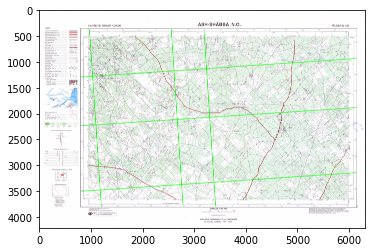

In [ ]:
##image=cv2.imread('SABKHET_EL_KALBIA_NE.JPG')
#image=cv2.imread('SIDI BOU ALI N.E.jpg')
image=cv2.imread('CHEBBA N.O.jpg')
georef(image)
colors(image)
triangles(image)
#triangles(image)

In [ ]:
def line(x1,y1,x2,y2):
    """Line encoded as l=(x,y)."""
    m = Decimal((y2 - y1)) / Decimal(x2 - x1)
    c = (y2 - (float(m) * x2))
    return float(m), float(c)

def utm(x1,y1,x2,y2, x):
  m,c= line(x1,y1,x2,y2)
  return x*m+c